In [1]:
import sqlite3
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
from datetime import datetime as dt
import seaborn as sns

In [2]:
db_loc = r"C:\Users\NoahLustig\Anaconda3\jupyter\glass_house_eda\glasshouse.db"
conn = sqlite3.connect(db_loc)
c = conn.cursor()

In [3]:
df = pd.read_sql('SELECT * FROM hourly_env_data', conn)

In [4]:
df.drop(['index', 'rain_qty_pct'], axis=1, inplace=True)
df.dropna(axis=0, how='all', inplace=True)
df.head()

,date_time,31_temp,31_rh,32_temp,32_rh,33_temp,33_rh,34_temp,34_rh,35_co2,35_temp,35_rh,36_temp,36_rh,outside_temp,rained,wind_speed,radiation,rad_sum,35_vpd_top
0,05/06/2018 00:00,19.0,77.00,19.4,75.97,20.91,74.0,20.90,75.00,453.73,21.3,70.0,21.8,73.03,14.3,0.0,0.0,0.0,1421.0,0.69
1,05/06/2018 01:00,18.6,79.00,18.4,79.00,20.00,76.0,20.20,76.97,434.97,20.1,72.0,20.5,75.00,14.1,0.0,0.0,0.0,1421.0,0.59
2,05/06/2018 02:00,18.6,81.00,17.8,81.00,19.80,79.0,19.10,78.97,439.18,19.3,75.0,19.8,76.97,14.2,0.0,0.0,0.0,1421.0,0.50
3,05/06/2018 03:00,18.3,82.00,18.2,82.00,19.70,81.0,17.50,81.00,441.39,18.3,79.0,19.0,79.97,14.3,1.0,0.0,0.0,1421.0,0.41
4,05/06/2018 04:00,17.8,83.97,18.6,81.97,19.70,82.0,17.89,82.00,445.36,18.3,80.0,18.8,82.00,14.7,0.0,0.0,0.0,1421.0,0.37


First we'll make some visualizations for temperature.

C:\Users\NoahLustig\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


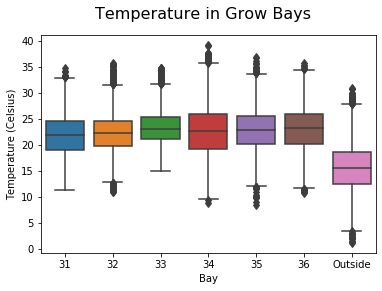

In [5]:
ax = sns.boxplot(data=df.ix[:,['31_temp', '32_temp', '33_temp', 
                              '34_temp', '35_temp', '36_temp', 'outside_temp']],
               fliersize=6, whis=1.5)
ax.set(xlabel='Bay',
       ylabel='Temperature (Celsius)',
       xticklabels=['31', '32', '33', '34', '35', '36', 'Outside'])

plt.suptitle('Temperature in Grow Bays', size=16)

plt.show()

Now let's examine RH

C:\Users\NoahLustig\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


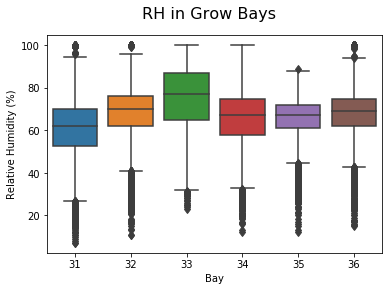

In [6]:
ax2 = sns.boxplot(data=df.ix[:,['31_rh', '32_rh', '33_rh', '34_rh',
                               '35_rh', '36_rh']],
                  fliersize=6, whis=1.5)
ax2.set(xlabel='Bay',
        ylabel='Relative Humidity (%)',
        xticklabels=['31','32','33', '34', '35', '36'])

plt.suptitle('RH in Grow Bays', size=16)
plt.show()

C:\Users\NoahLustig\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\NoahLustig\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\NoahLustig\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\NoahLustig\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


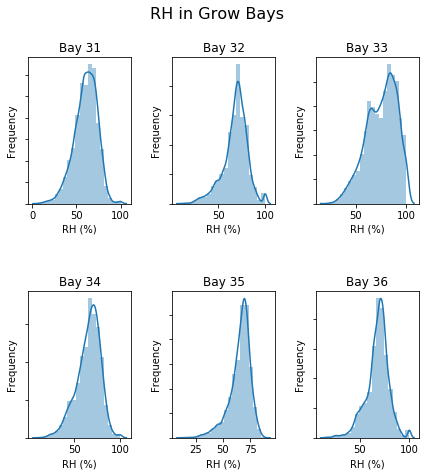

In [7]:

#create figure
f, ax3 = plt.subplots(2,3, figsize=(7,7))
f.suptitle('RH in Grow Bays', size=16)
#plot first one
sns.distplot(df['31_rh'], ax = ax3[0,0], bins=20)
ax3[0,0].set(xlabel='RH (%)', ylabel='Frequency', yticklabels=[], title='Bay 31')

#plot second
sns.distplot(df['32_rh'], ax = ax3[0,1], bins=20)
ax3[0,1].set(xlabel='RH (%)', ylabel='Frequency', yticklabels=[], title='Bay 32')

sns.distplot(df['33_rh'], ax = ax3[0,2], bins=20)
ax3[0,2].set(xlabel='RH (%)', ylabel='Frequency', yticklabels=[], title='Bay 33')

sns.distplot(df['34_rh'], ax = ax3[1,0], bins=20)
ax3[1,0].set(xlabel='RH (%)', ylabel='Frequency', yticklabels=[], title='Bay 34')

sns.distplot(df['35_rh'], ax = ax3[1,1], bins=20)
ax3[1,1].set(xlabel='RH (%)', ylabel='Frequency', yticklabels=[], title='Bay 35')

sns.distplot(df['36_rh'], ax = ax3[1,2], bins=20)
ax3[1,2].set(xlabel='RH (%)', ylabel='Frequency', yticklabels=[], title='Bay 36')

plt.subplots_adjust(wspace=.4, hspace=.6)
plt.show()

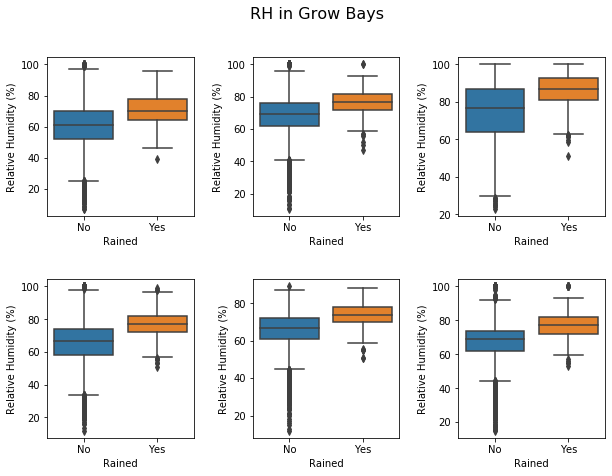

In [35]:
f, axc = plt.subplots(2,3, figsize=(10,7))
plt.suptitle('RH in Grow Bays', size=16)

#plot first one
sns.catplot(data=df, x='rained', y='31_rh', kind='box', ax=axc[0,0])
axc[0,0].set(xlabel='Rained',
        ylabel='Relative Humidity (%)',
       xticklabels=['No', 'Yes'])

#second one
sns.catplot(data=df, x='rained', y='32_rh', kind='box', ax = axc[0,1])
axc[0,1].set(xlabel='Rained',
        ylabel='Relative Humidity (%)',
       xticklabels=['No', 'Yes'])

#third one
sns.catplot(data=df, x='rained', y='33_rh', kind='box', ax=axc[0,2])
axc[0,2].set(xlabel='Rained',
        ylabel='Relative Humidity (%)',
       xticklabels=['No', 'Yes'])

#fourth one
sns.catplot(data=df, x='rained', y='34_rh', kind='box', ax=axc[1,0])
axc[1,0].set(xlabel='Rained',
        ylabel='Relative Humidity (%)',
       xticklabels=['No', 'Yes'])
#fifth one
sns.catplot(data=df, x='rained', y='35_rh', kind='box', ax=axc[1,1])
axc[1,1].set(xlabel='Rained',
        ylabel='Relative Humidity (%)',
       xticklabels=['No', 'Yes'])

#sixth one
sns.catplot(data=df, x='rained', y='36_rh', kind='box', ax=axc[1,2])
axc[1,2].set(xlabel='Rained',
        ylabel='Relative Humidity (%)',
       xticklabels=['No', 'Yes'])
for i in range(2,8):
    plt.close(i)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show()

Now let's check out the CO2 levels

C:\Users\NoahLustig\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


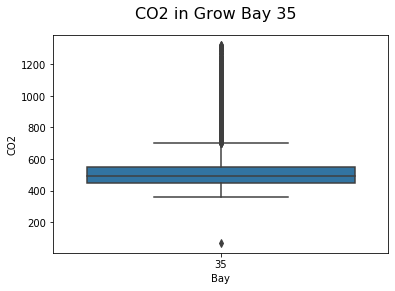

In [8]:
ax4 = sns.boxplot(data=df.ix[:,['35_co2']],
               fliersize=5, whis=1.5)
ax4.set(xlabel='Bay',
       ylabel='CO2',
       xticklabels=['35'])

plt.suptitle('CO2 in Grow Bay 35', size=16)

plt.show()

C:\Users\NoahLustig\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\NoahLustig\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\NoahLustig\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\NoahLustig\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


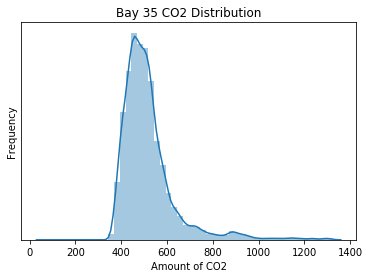

In [9]:
ax5 = sns.distplot(df['35_co2'], bins=50)
ax5.set(title='Bay 35 CO2 Distribution',
       xlabel='Amount of CO2',
       ylabel='Frequency',
        yticks = [],
       yticklabels=[])
plt.show()

Now let's graph the VPD distribution from Bay 35

C:\Users\NoahLustig\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


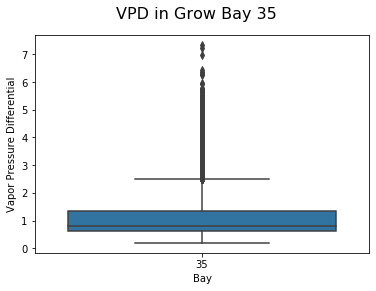

In [10]:
ax6 = sns.boxplot(data=df.ix[:,['35_vpd_top']],
               fliersize=5, whis=1.5)
ax6.set(xlabel='Bay',
       ylabel='Vapor Pressure Differential',
       xticklabels=['35'])

plt.suptitle('VPD in Grow Bay 35', size=16)

plt.show()

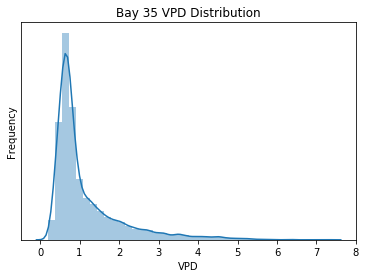

In [12]:
ax7 = sns.distplot(df['35_vpd_top'], bins=40)
ax7.set(title='Bay 35 VPD Distribution',
       xlabel='VPD',
       ylabel='Frequency',
        yticks = [],
       yticklabels=[])
plt.show()

Now we can start to look at the variables outside of the bays.

In [ ]:
ax5 = sns.barplot(x="rained", y="rained", data=df,
                  estimator=lambda x: len(x) / len(df) * 100)

ax5.set(xlabel='Rained',
        ylabel='Percent',
        xticklabels=['No', 'Yes'],
       yticklabels = ['0', '20%', '40%', '60%', '80%', '100%'])
plt.suptitle('Rain Frequency', fontsize=16)
plt.show()
